In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
from google.colab import files

import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

company_symbols = ["AMZN", "AAPL", "META", "INTC", "NVDA", "AMD", "BAC", "NFLX", "MSFT", "GOOG"]
company_names = ['Amazon','Apple','Meta','Intel','Nvidia','AMD','Bank of America','Netflix','Microsoft','Google']

for company in company_symbols:
  ticker = yf.Ticker(company)
  hist = ticker.history(period="1y")
  hist.to_csv(company + ".csv")

In [ ]:
stock_df = {}
for company in company_symbols:
  stock_df[company] = pd.read_csv(company + ".csv")
print(stock_df)

In [ ]:
stock_df['AMZN'].head

In [ ]:
stock_df['AMD'].to_csv('AMD.csv')

In [ ]:
files.download('AMD.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in range(len(company_symbols)):
  fig = stock_df[company_symbols[i]].plot(kind='line', x='Date', y='Volume', figsize=(25, 6), label=f'{company_names[i]} trading volume')

In [ ]:
stock_df['AMZN'].describe()

In [ ]:
for i in range(len(company_symbols)):
  stock_df[company_symbols[i]]['Price'] = (stock_df[company_symbols[i]]['Open'] + stock_df[company_symbols[i]]['High']\
                                           + stock_df[company_symbols[i]]['Low']+ stock_df[company_symbols[i]]['Close'])/4
   #adding a price column which is just an average of the OHLC prices, this is what I will be using for price calculations
print(stock_df['GOOG'].head)

<bound method NDFrame.head of            Date        Open        High         Low       Close    Volume  \
0    2021-08-24  141.543503  143.007507  141.353500  142.398499  15126000   
1    2021-08-25  142.882996  143.313004  142.439499  142.949997  12838000   
2    2021-08-26  142.618500  143.134796  142.091507  142.123001  14922000   
3    2021-08-27  142.112503  145.011002  142.020004  144.550507  24562000   
4    2021-08-30  144.704498  146.489502  144.600006  145.469498  16916000   
..          ...         ...         ...         ...         ...       ...   
248  2022-08-18  120.230003  121.690002  119.550003  120.860001  15652000   
249  2022-08-19  119.870003  120.000000  117.669998  118.120003  20171100   
250  2022-08-22  116.099998  116.500000  114.669998  115.070000  19316000   
251  2022-08-23  114.320000  115.930000  114.300003  114.769997  14372500   
252  2022-08-24  114.449997  115.459999  113.779999  115.404999   5617307   

     Dividends  Stock Splits       Price  
0 

In [ ]:
for i in range(len(company_symbols)):
  span_1, span_2, span_3 = 20, 50, 100
  span_1_df = stock_df[company_symbols[i]]['Price'].rolling(window=span_1, min_periods=span_1).mean()[:span_1]
  span_2_df = stock_df[company_symbols[i]]['Price'].rolling(window=span_2, min_periods=span_2).mean()[:span_2]
  span_3_df = stock_df[company_symbols[i]]['Price'].rolling(window=span_3, min_periods=span_3).mean()[:span_3]

  rest_1 = stock_df[company_symbols[i]]['Price'][span_1:]
  rest_2 = stock_df[company_symbols[i]]['Price'][span_2:]
  rest_3 = stock_df[company_symbols[i]]['Price'][span_3:]

  stock_df[company_symbols[i]]['20 Day EMA'] = pd.concat([span_1_df, rest_1]).ewm(span=span_1, adjust=False).mean()
  stock_df[company_symbols[i]]['50 Day EMA'] = pd.concat([span_2_df, rest_2]).ewm(span=span_2, adjust=False).mean()
  stock_df[company_symbols[i]]['100 Day EMA'] = pd.concat([span_3_df, rest_3]).ewm(span=span_3, adjust=False).mean()

  stock_df[company_symbols[i]].plot(kind='line', x='Date', y=['20 Day EMA', '50 Day EMA'],\
                                    figsize=(25, 6), label=[f'{company_names[i]} 20 Day EMA', f'{company_names[i]} 50 Day EMA'])
  stock_df[company_symbols[i]].plot(kind='line', x='Date', y=['100 Day EMA', 'Price'],\
                                    figsize=(25, 6), label=[f'{company_names[i]} 100 Day EMA', 'Price'])
  

In [ ]:
composed_df = stock_df['AMZN'].copy()
for i in range(len(company_symbols)):
  composed_df[f"{company_names[i]}'s stock prices"] = stock_df[company_symbols[i]]['Price']
print(composed_df.head())

         Date        Open        High         Low       Close    Volume  \
0  2021-08-24  164.000000  165.774506  163.729004  165.289001  51036000   
1  2021-08-25  165.493500  166.050003  164.307495  164.959000  33606000   
2  2021-08-26  164.949997  166.600006  164.800003  165.800003  41976000   
3  2021-08-27  166.661499  167.615997  165.687500  167.481506  48048000   
4  2021-08-30  167.871506  172.250000  167.761002  171.078506  63844000   

   Dividends  Stock Splits       Price  Amazon's stock prices  \
0          0           0.0  164.698128             164.698128   
1          0           0.0  165.202499             165.202499   
2          0           0.0  165.537502             165.537502   
3          0           0.0  166.861626             166.861626   
4          0           0.0  169.740253             169.740253   

   Apple's stock prices  Meta's stock prices  Intel's stock prices  \
0            148.935436           364.742500             51.949764   
1            148.2

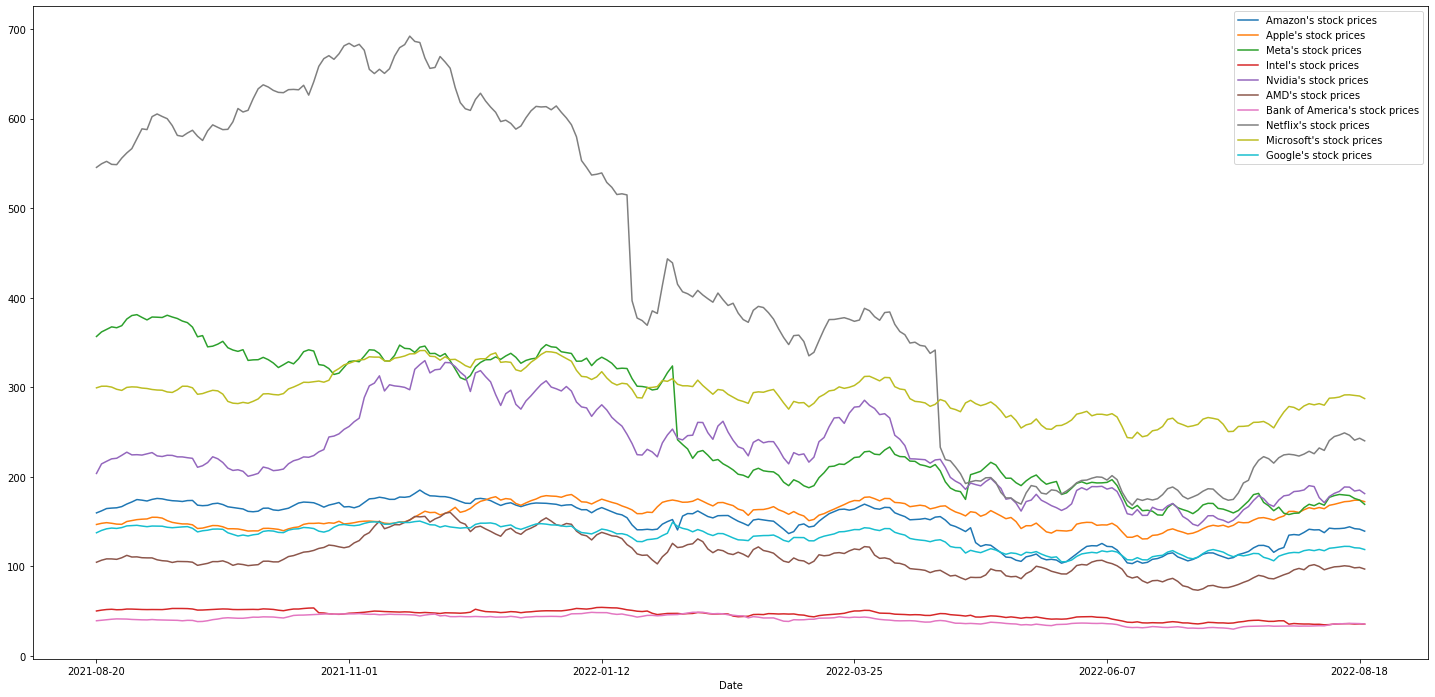

In [ ]:
composed_df.plot(x='Date', y=[f"{company_names[i]}'s stock prices" for i in range(len(company_names))], figsize=(25,12))

In [ ]:
composed_df=composed_df.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Dividends', 'Volume', 'Stock Splits', 'Price'], axis=1)

In [ ]:
composed_df.head()

,Amazon's stock prices,Apple's stock prices,Meta's stock prices,Intel's stock prices,Nvidia's stock prices,AMD's stock prices,Bank of America's stock prices,Netflix's stock prices,Microsoft's stock prices,Google's stock prices
0,164.698128,148.935436,364.742500,51.949764,217.451969,108.497499,40.485094,552.367493,301.299110,142.075752
1,165.202499,148.241811,367.562500,52.240188,220.205099,108.447500,41.097395,549.007507,300.314860,142.896374
2,165.537502,147.304566,366.582504,51.695636,220.844665,107.977499,41.489265,548.694992,297.870339,142.491951
3,166.861626,147.090754,368.887497,51.819068,224.119912,109.747501,41.440279,555.984985,296.618273,143.423504
4,169.740253,150.213281,376.307495,52.477361,227.625044,112.420000,41.281086,561.759995,299.985087,145.315876


In [ ]:
correlation_matrix = composed_df.corr()

In [ ]:
correlation_matrix

,Amazon's stock prices,Apple's stock prices,Meta's stock prices,Intel's stock prices,Nvidia's stock prices,AMD's stock prices,Bank of America's stock prices,Netflix's stock prices,Microsoft's stock prices,Google's stock prices
Amazon's stock prices,1.000000,0.411702,0.816248,0.795431,0.829312,0.770646,0.813098,0.908112,0.885113,0.956058
Apple's stock prices,0.411702,1.000000,0.068565,0.201721,0.568074,0.489125,0.436242,0.143486,0.538819,0.387479
Meta's stock prices,0.816248,0.068565,1.000000,0.857440,0.650998,0.673441,0.706820,0.930491,0.746776,0.845943
Intel's stock prices,0.795431,0.201721,0.857440,1.000000,0.678436,0.627913,0.802661,0.815446,0.671042,0.834961
Nvidia's stock prices,0.829312,0.568074,0.650998,0.678436,1.000000,0.952442,0.835417,0.769927,0.939868,0.865911
AMD's stock prices,0.770646,0.489125,0.673441,0.627913,0.952442,1.000000,0.826920,0.779524,0.920324,0.811622
Bank of America's stock prices,0.813098,0.436242,0.706820,0.802661,0.835417,0.826920,1.000000,0.805835,0.826276,0.858175
Netflix's stock prices,0.908112,0.143486,0.930491,0.815446,0.769927,0.779524,0.805835,1.000000,0.844200,0.921477
Microsoft's stock prices,0.885113,0.538819,0.746776,0.671042,0.939868,0.920324,0.826276,0.844200,1.000000,0.907881
Google's stock prices,0.956058,0.387479,0.845943,0.834961,0.865911,0.811622,0.858175,0.921477,0.907881,1.000000


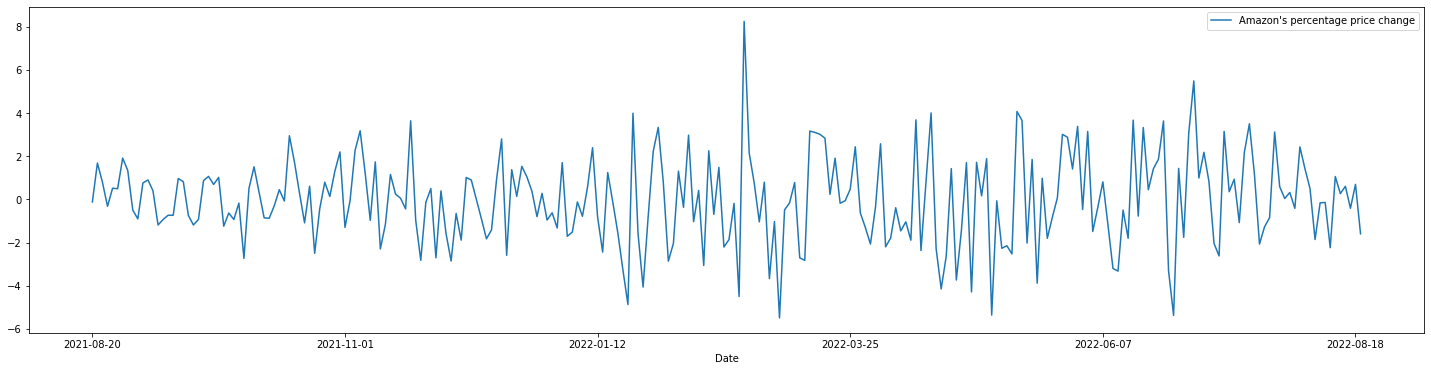

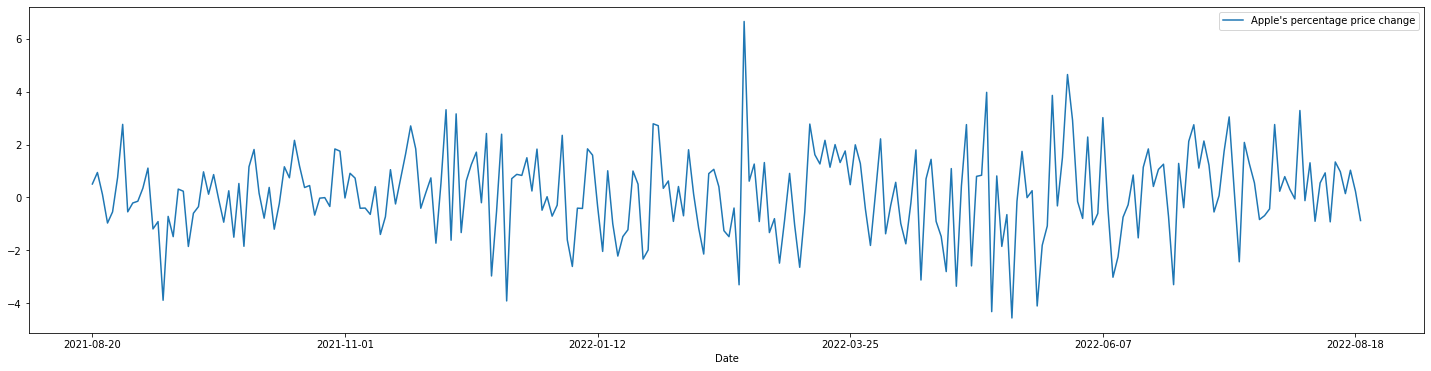

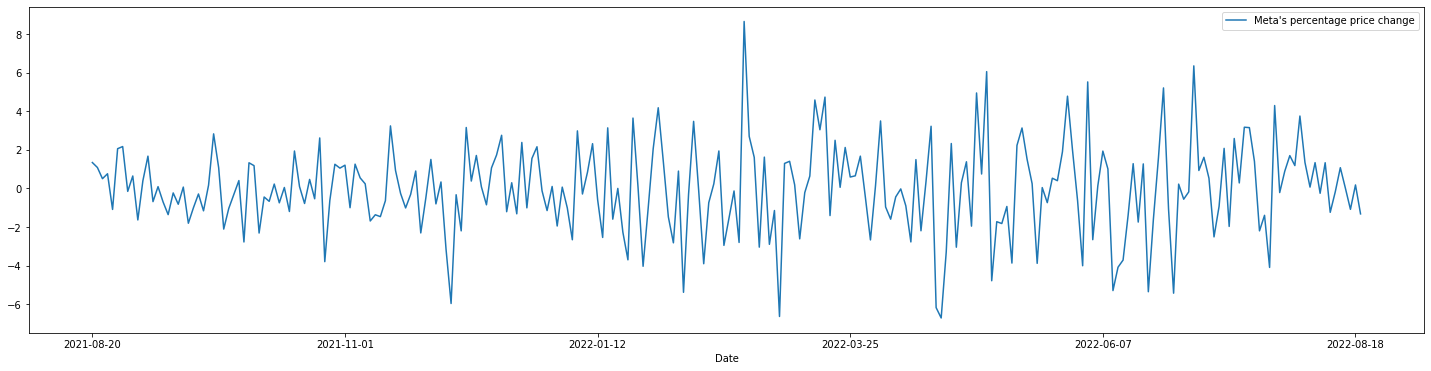

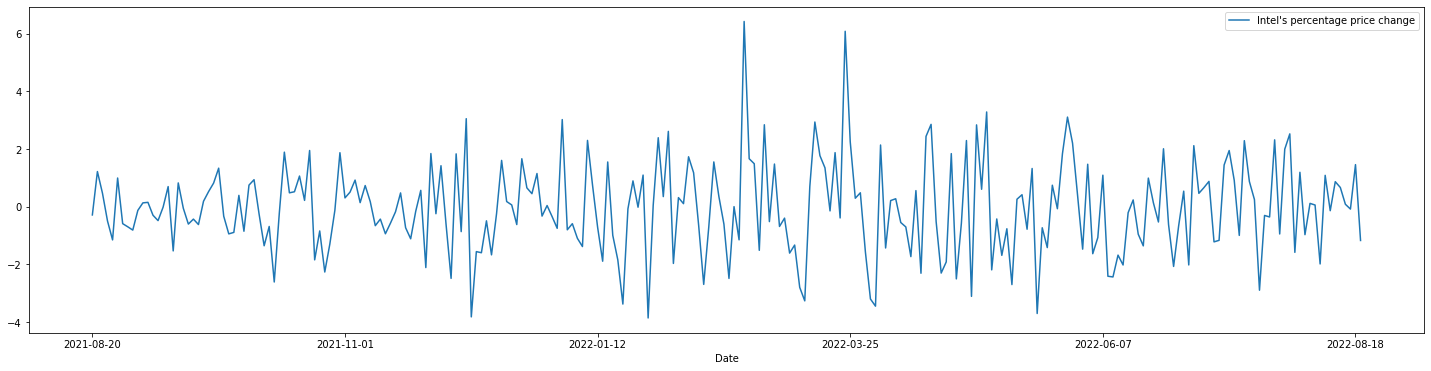

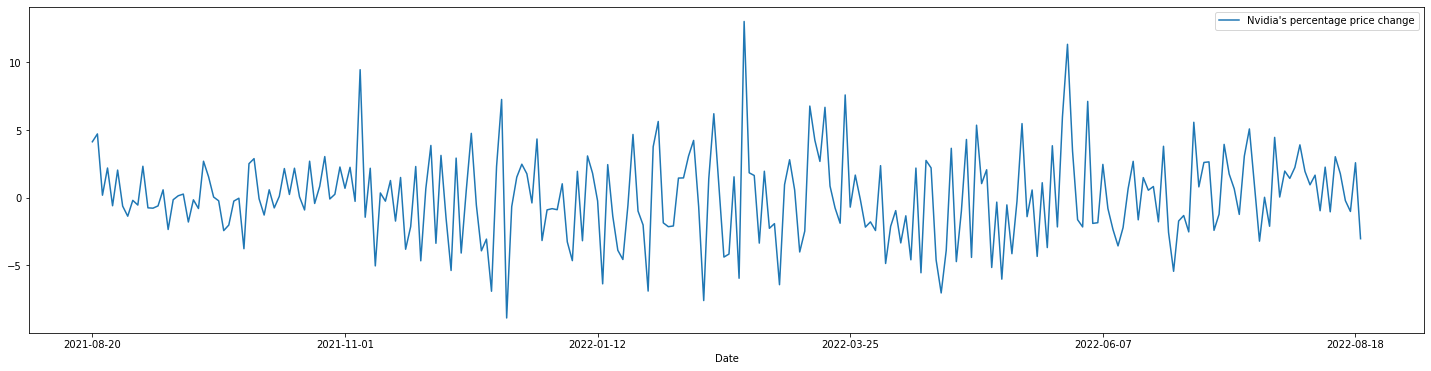

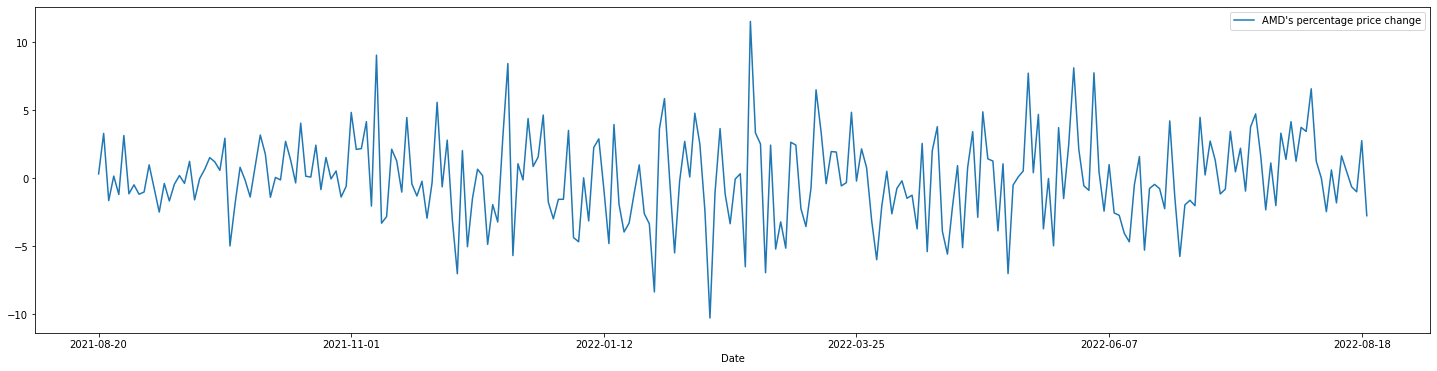

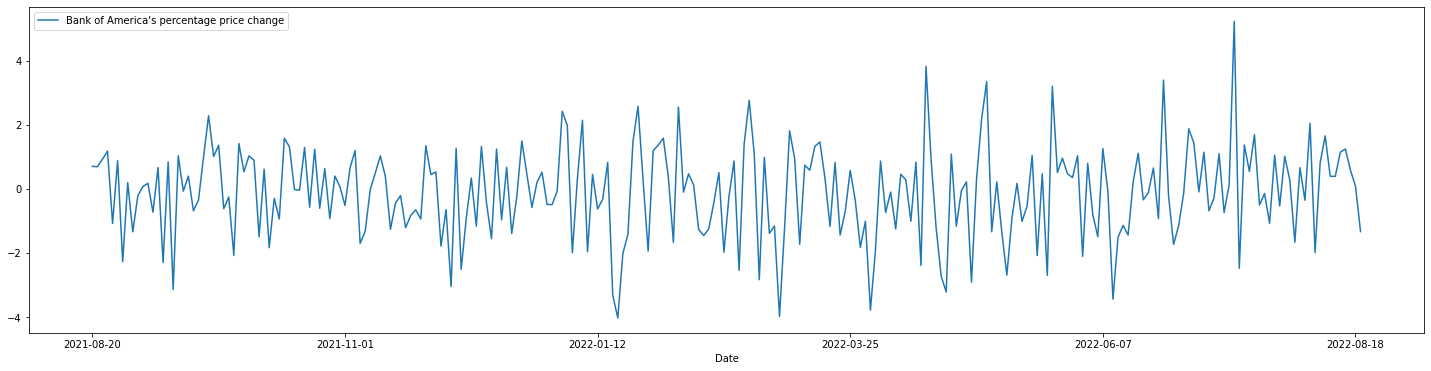

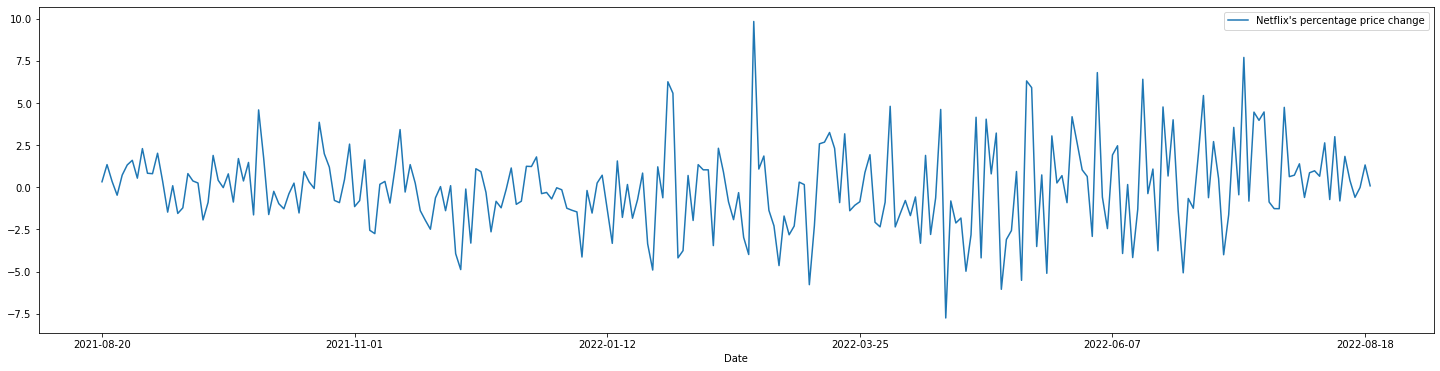

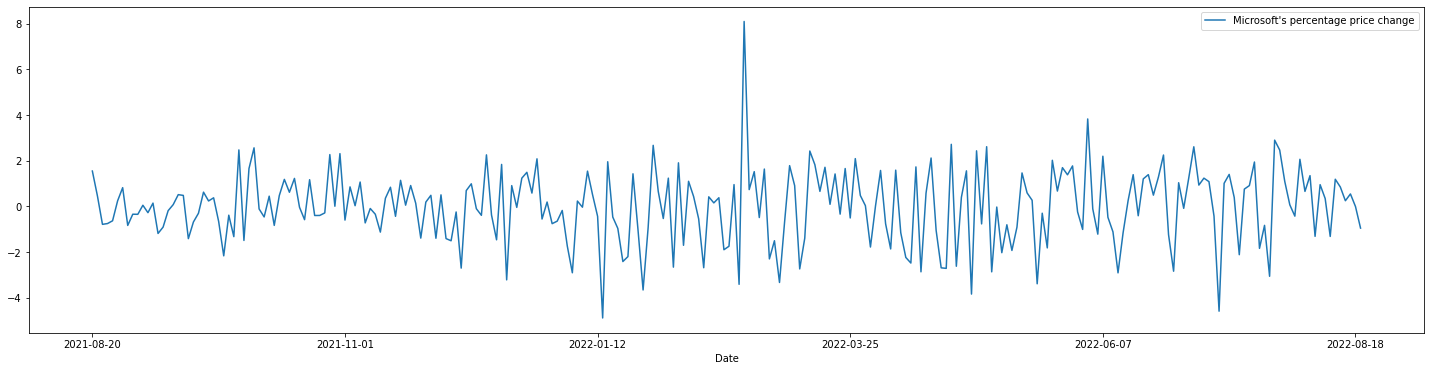

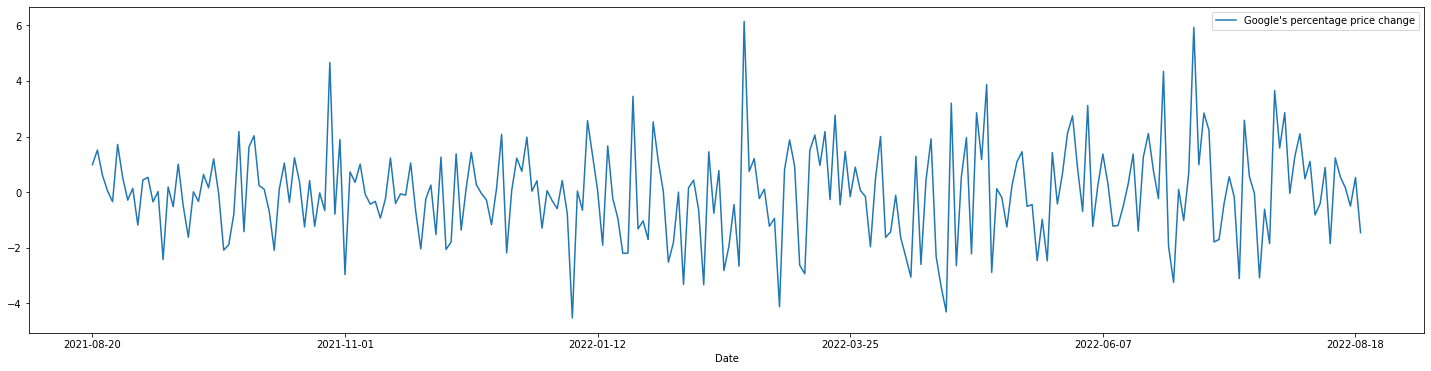

In [ ]:
for i in range(len(company_symbols)):
  stock_df[company_symbols[i]]['Percentage Price Change'] = (stock_df[company_symbols[i]]['Close']-stock_df[company_symbols[i]]['Open']) \
                                                            / (0.01 * stock_df[company_symbols[i]]['Open'])

  stock_df[company_symbols[i]].plot(x="Date", y="Percentage Price Change", figsize=(25,6), label=(f"{company_names[i]}'s percentage price change"))

In [ ]:
print(composed_df.head())

         Date        Open        High         Low       Close    Volume  \
0  2021-08-20  160.193497  160.390503  158.787994  159.997498  67168000   
1  2021-08-23  160.595001  164.044998  160.500504  163.293503  65362000   
2  2021-08-24  164.000000  165.774506  163.729004  165.289001  51036000   
3  2021-08-25  165.493500  166.050003  164.307495  164.959000  33606000   
4  2021-08-26  164.949997  166.600006  164.800003  165.800003  41976000   

   Dividends  Stock Splits       Price  20 Day EMA  ...  Amazon's Volume  \
0          0           0.0  159.842373         NaN  ...         67168000   
1          0           0.0  162.108501         NaN  ...         65362000   
2          0           0.0  164.698128         NaN  ...         51036000   
3          0           0.0  165.202499         NaN  ...         33606000   
4          0           0.0  165.537502         NaN  ...         41976000   

   Apple's Volume  Meta's Volume  Intel's Volume  Nvidia's Volume  \
0        60549600      

In [ ]:
composed_df['Tech Sector']= composed_df["Amazon's Volume"] + composed_df["Apple's Volume"] + composed_df["Meta's Volume"] + composed_df["Intel's Volume"]\
                            + composed_df["Nvidia's Volume"] + composed_df["AMD's Volume"] + composed_df["Microsoft's Volume"] + composed_df["Google's Volume"]

In [ ]:

composed_df.resample('MS').sum()

In [ ]:
composed_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Price,20 Day EMA,50 Day EMA,...,Apple's Volume,Meta's Volume,Intel's Volume,Nvidia's Volume,AMD's Volume,Bank of America's Volume,Netflix's Volume,Microsoft's Volume,Google's Volume,Tech Sector
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.0,252.000000,252.000000,233.000000,203.000000,...,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02
mean,149.567879,151.736601,147.303846,149.482002,7.246226e+07,0.0,0.079365,149.522582,149.206879,149.760058,...,8.799238e+07,2.847773e+07,3.437192e+07,4.820035e+07,8.240905e+07,4.841734e+07,8.165535e+06,2.995832e+07,2.727635e+07,4.111484e+08
std,23.330615,23.041373,23.530866,23.229843,3.134457e+07,0.0,1.259882,23.250112,21.969210,19.706057,...,2.657918e+07,1.787202e+07,1.484239e+07,1.736368e+07,3.334405e+07,1.507094e+07,1.099067e+07,1.100466e+07,1.045797e+07,1.115658e+08
min,102.750000,104.580002,101.260002,102.309998,3.360600e+07,0.0,0.000000,103.202499,110.972314,116.879480,...,4.100000e+07,7.509600e+06,1.297620e+07,1.462760e+07,2.648260e+07,2.313830e+07,1.287200e+06,1.474790e+07,1.246400e+07,2.057771e+08
25%,134.854996,137.597496,133.234997,134.752499,5.335300e+07,0.0,0.000000,135.071250,127.690524,128.479627,...,6.909748e+07,1.830215e+07,2.522288e+07,3.845350e+07,5.563955e+07,3.763230e+07,3.376775e+06,2.240360e+07,1.954650e+07,3.306308e+08
50%,157.207748,159.125000,154.505753,157.439247,6.427300e+07,0.0,0.000000,156.777498,154.836080,156.527285,...,8.248645e+07,2.506790e+07,3.182525e+07,4.791890e+07,8.113915e+07,4.632490e+07,5.442550e+06,2.827405e+07,2.513300e+07,4.053783e+08
75%,168.502377,170.785378,166.469627,169.024754,8.279950e+07,0.0,0.000000,168.592719,168.004113,168.481941,...,1.002058e+08,3.190892e+07,4.021382e+07,5.920585e+07,1.008791e+08,5.418545e+07,8.989400e+06,3.480578e+07,3.220250e+07,4.704331e+08
max,185.634506,188.107498,183.785995,184.802994,2.726620e+08,0.0,20.000000,185.339127,176.571086,173.384479,...,1.954327e+08,1.881199e+08,1.252141e+08,1.153631e+08,2.253941e+08,1.242424e+08,1.333875e+08,9.042890e+07,8.975000e+07,7.904931e+08


In [ ]:
for i in range(len(company_symbols)):
  if company_symbols[i] == 'BAC' or company_symbols[i] == 'NFLX':
    continue
  stock_df[company_symbols[i]]['Tech Sector Trading Volumes'] = 

In [ ]:
fig, axs = plt.subplots(1, figsize=(25, 9))
fig.suptitle("Arista Networks trading volume")
axs.set_xlabel('Date')
axs.set_ylabel('Volume')
anet = yf.Ticker("ANET")
hist = anet.history(period = "1y")
axs.plot(hist['Volume'])

# Milestone 2 Begins Here, Will be using AMD's data from here on

In [ ]:
from IPython.display import clear_output

import tensorflow.compat.v2.feature_column as fc

In [ ]:
new_df = stock_df['AMD'].copy()
print(new_df.head)

<bound method NDFrame.head of            Date        Open        High         Low       Close    Volume  \
0    2021-08-23  105.300003  109.019997  104.860001  108.769997  68835300   
1    2021-08-24  109.449997  109.610001  107.279999  107.650002  51239300   
2    2021-08-25  108.129997  109.910004  107.449997  108.300003  45485500   
3    2021-08-26  108.570000  109.230003  106.839996  107.269997  51442500   
4    2021-08-27  108.010002  111.779999  107.800003  111.400002  61030000   
..          ...         ...         ...         ...         ...       ...   
248  2022-08-17   99.260002   99.639999   96.730003   98.269997  63735600   
249  2022-08-18   97.739998  101.070000   96.730003  100.440002  76059500   
250  2022-08-19   98.669998   99.250000   94.589996   95.949997  67167500   
251  2022-08-22   94.400002   95.019997   92.360001   92.839996  61777200   
252  2022-08-23   92.389999   94.440002   92.110001   93.160103  43472116   

     Dividends  Stock Splits       Price  
0 

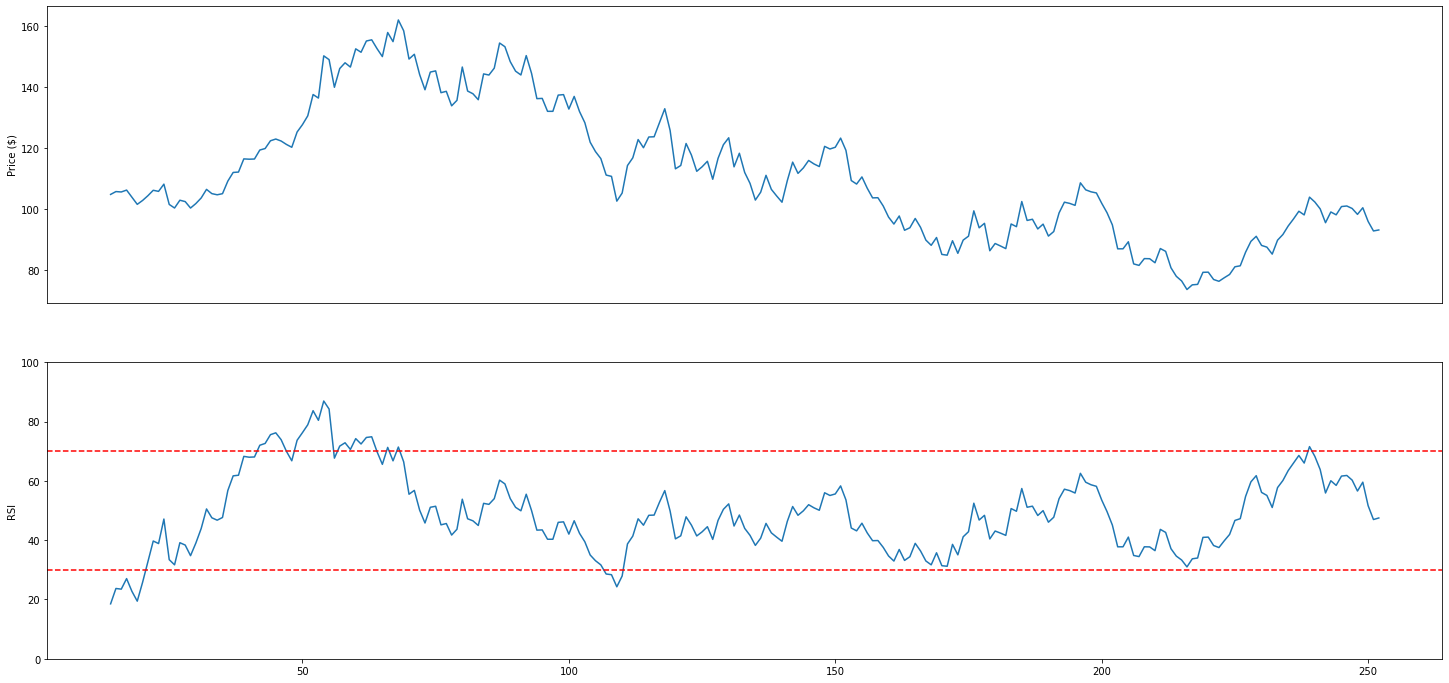

<Figure size 1800x864 with 0 Axes>

In [ ]:
delta = new_df['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down
new_df['RSI'] = 100 - (100/(1 + rs))
ticker = new_df.copy()
ticker = ticker.iloc[14:]
fig, (ax1, ax2) = plt.subplots(2, figsize=(25,12))
fig = plt.figure(figsize =(25, 12))
ax1.get_xaxis().set_visible(False)
fig.suptitle('AMD')
ticker['Close'].plot(ax=ax1)
ax1.set_ylabel('Price ($)')
ticker['RSI'].plot(ax=ax2)
ax2.set_ylim(0,100)
ax2.axhline(30, color='r', linestyle='--')
ax2.axhline(70, color='r', linestyle='--')
ax2.set_ylabel('RSI')
plt.show()

In [ ]:
bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band

In [ ]:
new_df['20 Day Moving Average'] = new_df['Price'].rolling(window=20).mean()

In [ ]:
new_df['20 Day Std'] = new_df['Price'].rolling(window=20).std()

In [ ]:
new_df['Bollinger Up'] = new_df['20 Day Moving Average'] + (new_df['20 Day Std'] * 2)
new_df['Bollinger Down'] = new_df['20 Day Moving Average'] - (new_df['20 Day Std'] * 2)

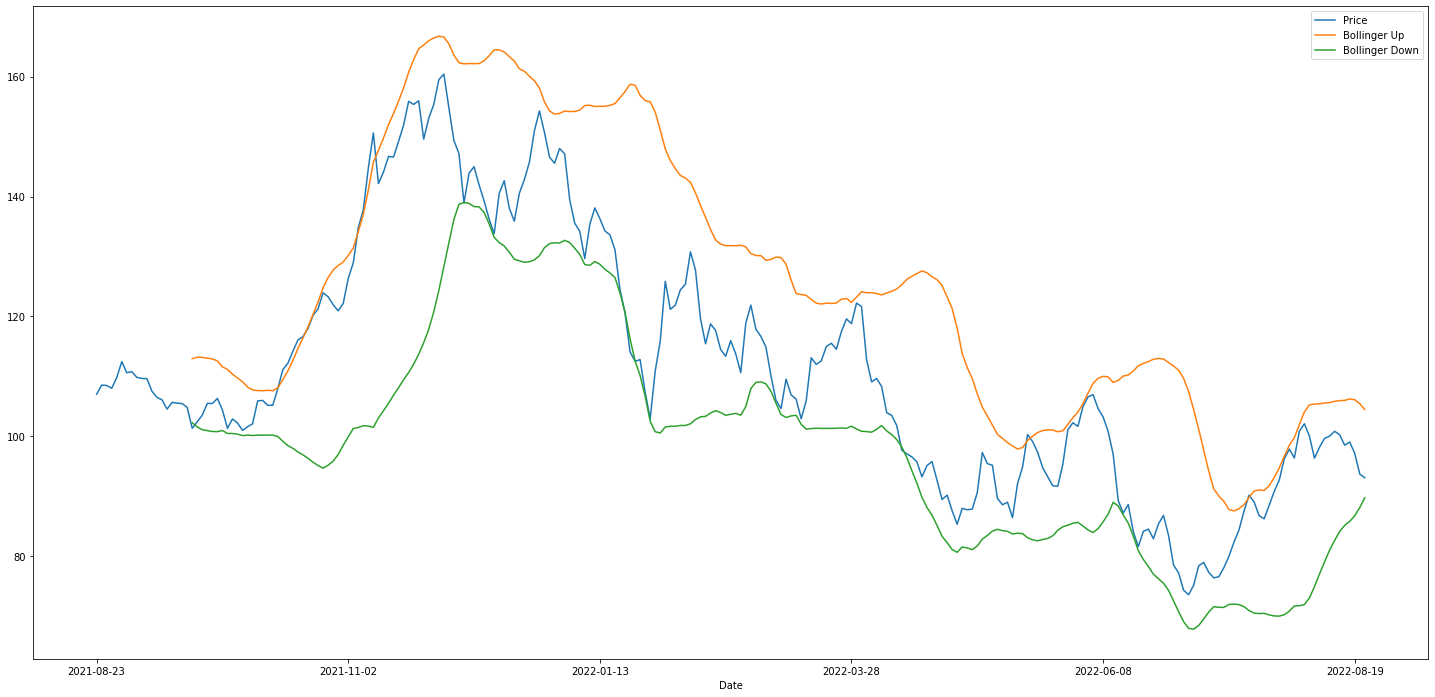

In [ ]:
new_df.plot(x='Date', y=['Price', 'Bollinger Up', 'Bollinger Down'], figsize=(25,12))

In [ ]:
amd_df = pd.DataFrame(columns=['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7','Current Price'])
amd_df['Day 1'] = new_df['Price']
amd_df['Day 2'] = new_df['Price']
amd_df['Day 3'] = new_df['Price']
amd_df['Day 4'] = new_df['Price']
amd_df['Day 5'] = new_df['Price']
amd_df['Day 6'] = new_df['Price']
amd_df['Day 7'] = new_df['Price']
amd_df['Current Price'] = new_df['Price']

In [ ]:
print(len(new_df['Open']))

253


In [ ]:
for i in range(len(new_df['Open'])):
  if i >= 7:
    amd_df['Day 1'].iloc[i-7] = new_df['Price'].iloc[i-7]
    amd_df['Day 2'].iloc[i-7] = new_df['Price'].iloc[i-6]
    amd_df['Day 3'].iloc[i-7] = new_df['Price'].iloc[i-5]
    amd_df['Day 4'].iloc[i-7] = new_df['Price'].iloc[i-4]
    amd_df['Day 5'].iloc[i-7] = new_df['Price'].iloc[i-3]
    amd_df['Day 6'].iloc[i-7] = new_df['Price'].iloc[i-2]
    amd_df['Day 7'].iloc[i-7] = new_df['Price'].iloc[i-1]
    amd_df['Current Price'].iloc[i-7] = new_df['Price'].iloc[i]

In [ ]:
amd_df=amd_df.dropna()
print(amd_df.head)

<bound method NDFrame.head of           Day 1       Day 2       Day 3       Day 4       Day 5       Day 6  \
0    106.987499  108.497499  108.447500  107.977499  109.747501  112.420000   
1    108.497499  108.447500  107.977499  109.747501  112.420000  110.567501   
2    108.447500  107.977499  109.747501  112.420000  110.567501  110.747499   
3    107.977499  109.747501  112.420000  110.567501  110.747499  109.792498   
4    109.747501  112.420000  110.567501  110.747499  109.792498  109.609999   
..          ...         ...         ...         ...         ...         ...   
248   98.475000   98.475000   98.475000   98.475000   98.475000   98.475000   
249   98.995001   98.995001   98.995001   98.995001   98.995001   98.995001   
250   97.114998   97.114998   97.114998   97.114998   97.114998   97.114998   
251   93.654999   93.654999   93.654999   93.654999   93.654999   93.654999   
252   93.025026   93.025026   93.025026   93.025026   93.025026   93.025026   

          Day 7  Curr

In [ ]:
amd_df.round(2)

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Current Price
0,106.99,108.50,108.45,107.98,109.75,112.42,110.57,110.75
1,108.50,108.45,107.98,109.75,112.42,110.57,110.75,109.79
2,108.45,107.98,109.75,112.42,110.57,110.75,109.79,109.61
3,107.98,109.75,112.42,110.57,110.75,109.79,109.61,109.59
4,109.75,112.42,110.57,110.75,109.79,109.61,109.59,107.47
...,...,...,...,...,...,...,...,...
248,98.48,98.48,98.48,98.48,98.48,98.48,98.48,98.48
249,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
250,97.11,97.11,97.11,97.11,97.11,97.11,97.11,97.11
251,93.65,93.65,93.65,93.65,93.65,93.65,93.65,93.65


In [ ]:
NUMERIC_COLUMNS = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7']

In [ ]:
feature_columns = []

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = tf.float32))

In [ ]:
linear_est = tf.estimator.LinearRegressor(feature_columns = feature_columns) #[Day_1, Day_2, Day_3, Day_4, Day_5, Day_6, Day_7]

In [ ]:
x_train = amd_df[:148]
x_valid = amd_df[148:197]
x_test = amd_df[197:]
print(x_test.head())

          Day 1       Day 2       Day 3       Day 4       Day 5      Day 6  \
197  106.535002  106.930000  104.592499  103.182501  100.762501  96.955000   
198  106.930000  104.592499  103.182501  100.762501   96.955000  89.230000   
199  104.592499  103.182501  100.762501   96.955000   89.230000  87.130001   
200  103.182501  100.762501   96.955000   89.230000   87.130001  88.562502   
201  100.762501   96.955000   89.230000   87.130001   88.562502  84.012501   

         Day 7  Current Price  
197  89.230000      87.130001  
198  87.130001      88.562502  
199  88.562502      84.012501  
200  84.012501      81.532501  
201  81.532501      84.092499  


In [ ]:
y_train = x_train.pop('Current Price')
y_valid = x_valid.pop('Current Price')
y_test = x_test.pop('Current Price')
print(y_test.head)

In [ ]:
print(x_test.head())

          Day 1       Day 2       Day 3       Day 4       Day 5      Day 6  \
197  106.535002  106.930000  104.592499  103.182501  100.762501  96.955000   
198  106.930000  104.592499  103.182501  100.762501   96.955000  89.230000   
199  104.592499  103.182501  100.762501   96.955000   89.230000  87.130001   
200  103.182501  100.762501   96.955000   89.230000   87.130001  88.562502   
201  100.762501   96.955000   89.230000   87.130001   88.562502  84.012501   

         Day 7  
197  89.230000  
198  87.130001  
199  88.562502  
200  84.012501  
201  81.532501  


In [ ]:
def create_input_fn(panda_data_df, label_df, num_epochs = 20, shuffle = True, batch_size = 32):
  def input_function():
    dataset_object = tf.data.Dataset.from_tensor_slices((dict(panda_data_df), label_df))  #puts our panda dataset into a dictionary and that alongside the label is made the object that is required for our model.
    if shuffle:
      dataset_object = dataset_object.shuffle(1000) #randomize order of data

    dataset_object = dataset_object.batch(batch_size).repeat(num_epochs)  # split dataset into batches and repeats process for the number of epochs
    return dataset_object  # return a batch of the dataset
  return input_function

In [ ]:
train_input_fn = create_input_fn(x_train, y_train)
valid_input_fn = create_input_fn(x_valid, y_valid, num_epochs = 1, shuffle = False)
test_input_fn = create_input_fn(x_test, y_test, num_epochs = 1, shuffle = False)

In [ ]:
linear_est.train(train_input_fn)

/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
result = linear_est.evaluate(valid_input_fn)
print(result)

/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


{'average_loss': 30.790194, 'label/mean': 96.037704, 'loss': 32.60943, 'prediction/mean': 95.748924, 'global_step': 100}


In [ ]:
predictions = list(linear_est.predict(test_input_fn))

/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


In [ ]:
print(predictions)

[{'predictions': array([98.70431], dtype=float32)}, {'predictions': array([95.82051], dtype=float32)}, {'predictions': array([93.342636], dtype=float32)}, {'predictions': array([90.47587], dtype=float32)}, {'predictions': array([87.511505], dtype=float32)}, {'predictions': array([85.43396], dtype=float32)}, {'predictions': array([83.93278], dtype=float32)}, {'predictions': array([83.0915], dtype=float32)}, {'predictions': array([82.9648], dtype=float32)}, {'predictions': array([82.90104], dtype=float32)}, {'predictions': array([82.75045], dtype=float32)}, {'predictions': array([82.04382], dtype=float32)}, {'predictions': array([80.903854], dtype=float32)}, {'predictions': array([79.31327], dtype=float32)}, {'predictions': array([77.90868], dtype=float32)}, {'predictions': array([76.600426], dtype=float32)}, {'predictions': array([75.74931], dtype=float32)}, {'predictions': array([75.367065], dtype=float32)}, {'predictions': array([75.24703], dtype=float32)}, {'predictions': array([75.1

In [ ]:
print(predictions[0]['predictions'][0])

98.70431


In [ ]:
lrg_predictions = []
for pred in predictions:
  lrg_predictions.append(pred['predictions'][0])

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse_lrg = mean_squared_error(y_test, lrg_predictions)
print("MSE: ", mse_lrg)

MSE:  24.959534975644605


In [ ]:
xgbr = XGBRegressor(verbosity=0)
xgbr.fit(x_train, y_train)
score = xgbr.score(x_train, y_train)
print("Training score: ", score)

Training score:  0.9933969460081237


In [ ]:
validation_score = cross_val_score(xgbr, x_valid, y_valid, cv=10)
print("CV mean score: ", validation_score.mean())

CV mean score:  -4.958843033149105


In [ ]:
xgbr_prediction = xgbr.predict(x_test)
mse_xgbr = mean_squared_error(y_test, xgbr_prediction)
print("MSE: ", mse_xgbr)

MSE:  291.8976706512597


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf_model = rf.fit(x_train,y_train)

In [ ]:
rf_model.score(x_valid, y_valid)

-1.8464286223554698

In [ ]:
rf_prediction = rf_model.predict(x_test)

In [ ]:
mse_rf = mean_squared_error(y_test, rf_prediction)
print("MSE: ", mse_rf)

MSE:  307.76370298286673


In [ ]:
from sklearn.svm import LinearSVR

In [ ]:
svr = LinearSVR()

In [ ]:
svr_model = svr.fit(x_train, y_train)

In [ ]:
svr_model.score(x_valid, y_valid)

0.7962719337273376

In [ ]:
svr_prediction = svr_model.predict(x_test)

In [ ]:
mse_svr = mean_squared_error(y_test, svr_prediction)
print("MSE: ", mse_svr)

MSE:  3.814797707868145


I'll be comparing using MAE and MSE

In [ ]:
mae_lrg = mean_absolute_error(y_test, lrg_predictions)
print("MAE: ", mae_lrg)

mae_xgbr = mean_absolute_error(y_test, xgbr_prediction)
print("MAE: ", mae_xgbr)

mae_rf = mean_absolute_error(y_test, rf_prediction)
print("MAE: ", mae_rf)

mae_svr = mean_absolute_error(y_test, svr_prediction)
print("MAE: ", mae_svr)

MAE:  4.039564677647182
MAE:  14.737569672720772
MAE:  15.263310585021966
MAE:  1.4954242384395189


In [ ]:
print(f'Metrics for the Linear Regression Model\nMAE: {mae_lrg}\tMSE: {mse_lrg}\n')
print(f'Metrics for the XGBRegressor Model\nMAE: {mae_xgbr}\tMSE: {mse_xgbr}\n')
print(f'Metrics for the RandomForest Regression Model\nMAE: {mae_rf}\tMSE: {mse_rf}\n')
print(f'Metrics for the SVM Regression Model\nMAE: {mae_svr}\tMSE: {mse_svr}\n')

Metrics for the Linear Regression Model
MAE: 4.039564677647182	MSE: 24.959534975644605

Metrics for the XGBRegressor Model
MAE: 14.737569672720772	MSE: 291.8976706512597

Metrics for the RandomForest Regression Model
MAE: 15.263310585021966	MSE: 307.76370298286673

Metrics for the SVM Regression Model
MAE: 1.4954242384395189	MSE: 3.814797707868145



MAE box plot

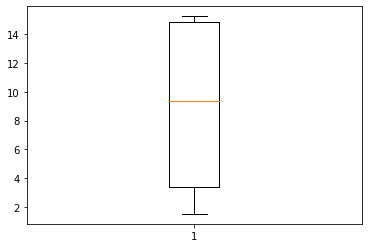

In [ ]:
data= [mae_rf, mae_lrg, mae_svr, mae_xgbr]

plt.boxplot(data)
plt.show()

MSE box plot

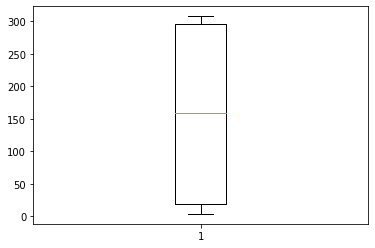

In [ ]:
data= [mse_rf, mse_lrg, mse_svr, mse_xgbr]

plt.boxplot(data)
plt.show()

In [ ]:
prediction_df = pd.DataFrame()
prediction_df['Rows'] = [i + 1 for i in range(56)]

In [ ]:
y_test.describe()

count     56.000000
mean      89.307858
std        8.727522
min       73.497499
25%       82.701252
50%       88.785001
75%       97.893750
max      102.050001
Name: Current Price, dtype: float64

In [ ]:
actual_price = []
for i in range(len(y_test)):
  actual_price.append(y_test.iloc[i])

In [ ]:
print(actual_price)

[87.13000106811523, 88.56250190734863, 84.01250076293945, 81.53250122070312, 84.09249877929688, 84.45750045776367, 82.84750175476074, 85.3125, 86.74750137329102, 83.41250038146973, 78.45000076293945, 77.14750289916992, 74.25, 73.49749946594238, 75.08749961853027, 78.34500122070312, 78.88249969482422, 77.23249816894531, 76.3025016784668, 76.51250076293945, 78.02000045776367, 79.89249992370605, 82.26250076293945, 84.31000137329102, 87.45499992370605, 90.12249946594238, 89.00749969482422, 86.70750045776367, 86.17749977111816, 88.41750144958496, 90.7249984741211, 92.63499832153322, 96.17999839782715, 97.81999969482422, 96.32749938964844, 100.81500053405762, 102.05000114440918, 99.97999954223633, 96.30249977111816, 98.11499977111816, 99.60500144958496, 99.97750091552734, 100.79250144958496, 100.2024974822998, 98.47500038146973, 98.9950008392334, 97.11499786376953, 93.65499877929688, 93.02502632141113, 100.79250144958496, 100.2024974822998, 98.47500038146973, 98.9950008392334, 97.11499786376

In [ ]:
prediction_df["LinearRegressor's Price"] = lrg_predictions
prediction_df["XGBRegressor's Price"] = xgbr_prediction
prediction_df["RFRegressor's Price"] = rf_prediction
prediction_df["SVMRegressor's Price"] = svr_prediction
prediction_df['Actual Price'] = actual_price

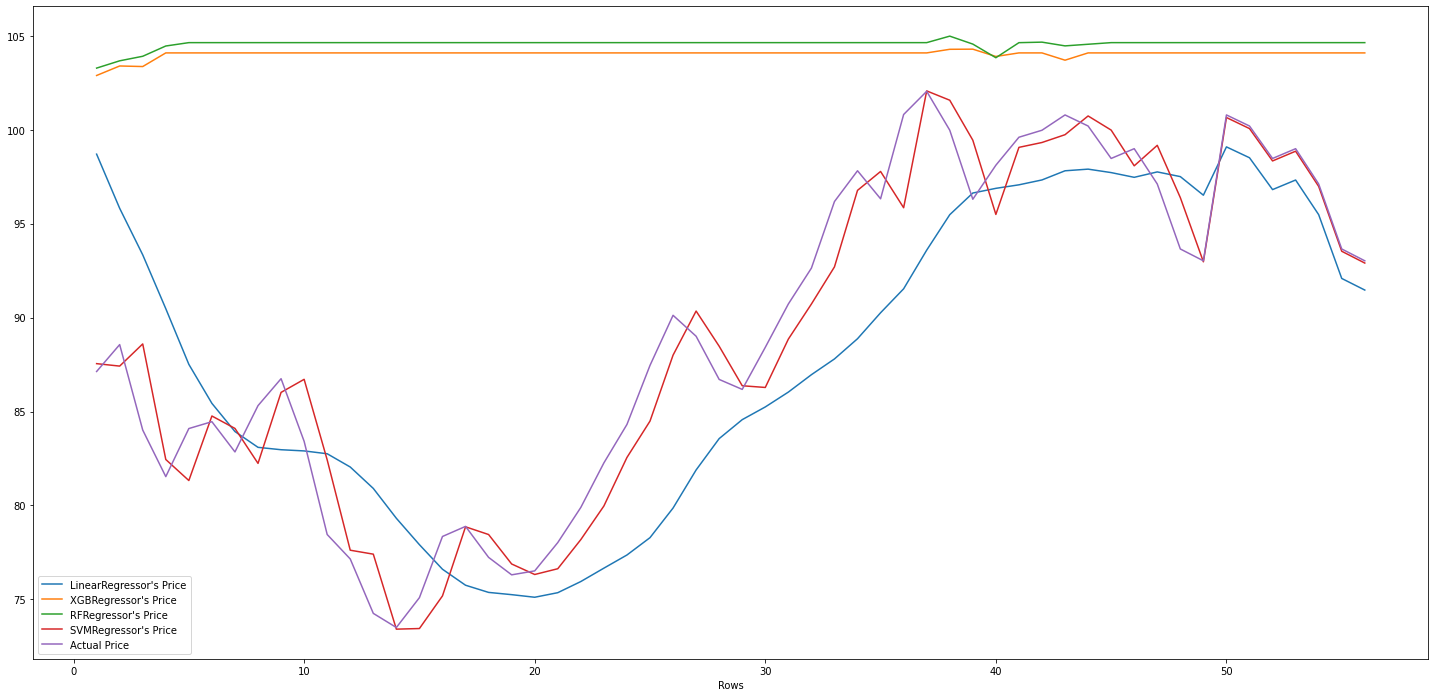

In [ ]:
prediction_df.plot(x='Rows', y=["LinearRegressor's Price", "XGBRegressor's Price", "RFRegressor's Price", "SVMRegressor's Price", "Actual Price"], figsize=(25, 12))

The predictive function will be made for the SVM regressor model only, since it was the most accurate.

In [ ]:
def predict_advice(input):
  recommendations = []
  predict = svr_model.predict(input)
  for i in range(len(input)):
    print(((predict[i]-input['Day 7'].iloc[i])/(0.01 * input['Day 7'].iloc[i])))
    if ((predict[i]-input['Day 7'].iloc[i])/(0.01 * input['Day 7'].iloc[i])) >= 2.0:
      recommendations.append('Buy the stock') 
    elif ((predict[i]-input['Day 7'].iloc[i])/(0.01 * input['Day 7'].iloc[i])) <= -2.0:
      recommendations.append('Sell the stock') 
    else:
      recommendations.append('Hold!!') 

  return recommendations


In [ ]:
test_df = x_test.copy()

print(predict_advice(test_df))

-1.8845186477925322
0.3303486857254574
0.04075536522562144
-1.8663156788265876
-0.2554722644764751
0.794100124625913
-0.42454110816055124
-0.7357513025295888
0.8267710184673511
-0.039399524567996266
-1.184725612794365
-1.0656297180203738
0.33162625528070716
-1.1310075578108174
-0.07421414772189136
0.12435408623000607
0.6574012648954578
-0.5496193543470458
-0.4559022948721873
0.023880758051778455
0.15039756163627369
0.2044544232967934
0.09429374878188598
0.3513482937893849
0.21228186577795877
0.6234190653677584
0.25143969926918486
-0.5970692257832423
-0.3874012164838602
0.11943899874191896
0.4943150372931458
-0.002514167791879785
0.07133042457625326
0.6192384461393495
-0.03895190342726805
-0.4947020349349019
1.2469849951097245
-0.46421624906464876
-0.5315103087322235
-0.8395547130100387
0.9689714818811869
-0.28137467413632755
-0.2368074575632178
-0.05406956215745258
-0.2166110458836191
-0.39749855971820475
0.1808317243391444
-0.7473083387592022
-0.7289988089737863
-0.13641471201554067
-